In [2]:
def bad_func(x):
    x + 3 - ''
    return x

In [3]:
bad_func(30)

TypeError: unsupported operand type(s) for -: 'int' and 'str'

0

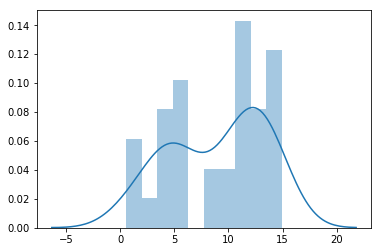

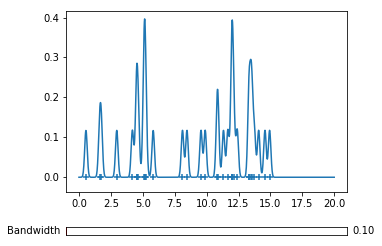

In [9]:
""" Simple template for matplotlib slider
"""
from matplotlib.widgets import Slider

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import scipy.stats
from sklearn.neighbors import KernelDensity


mu_1 = 5
var_1 = 2
n_1 = 14

mu_2 = 12
var_2 = 2
n_2 = 20

data = np.hstack([
                 scipy.stats.norm.rvs(mu_1, var_1, n_1),
                 scipy.stats.norm.rvs(mu_2, var_2, n_2)
                 ])

sns.distplot(data, bins=10)

# Initialize kernel density estimation
x_space = np.linspace(0, 20, 1000)
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data.reshape(-1, 1))
y_space = np.exp(kde.score_samples(x_space.reshape(-1, 1)))

# Create subplots
fig, ax = plt.subplots()
# Move the plot up and to the right a bit
plt.subplots_adjust(left=0.25, bottom=0.25)

# Plot the scatter (markers at the bottom) and the line
ax.scatter(data, np.zeros(data.shape), marker='+')
line, = ax.plot(x_space, y_space)

# Create the slider axes and the slider
# plt.axes([left, bottom, width, height])
slider_ax = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor='white')
slider = Slider(slider_ax, 'Bandwidth', 0.1, 1.0, valinit=0.1)


# Define the update function
def update(val):
    # Extract the value from the slider
    bandwidth = slider.val

    # Perform some new calculation
    kde.bandwidth = bandwidth
    y_space = np.exp(kde.score_samples(x_space.reshape(-1, 1)))

    # Update the visual
    line.set_ydata(y_space)
    fig.canvas.draw_idle()

# Add update function to the slider
slider.on_changed(update)

# plt.show()



# Slider